# Install dependencies

In [1]:
!pip install graphsense-python
import pandas as pd
import graphsense as gs
from graphsense.api import addresses_api, blocks_api, entities_api, general_api, txs_api, bulk_api
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Client

In [2]:
configuration = gs.Configuration(
    host = "https://api.ikna.io/",
    api_key = {
        'api_key': ""
    })


# Read Seed Addresses



In [3]:
addresses = pd.read_csv(
    "https://raw.githubusercontent.com/iknaio/iknaio-api-tutorial/main/data/sextortion_addresses.csv",
    header=None,
    names=["address"]
)
addresses.head(4)

,address
0,1JwRp2J8bQcoG8XTUbxQZaEj9QB4RB6zEa
1,1EZS92K4xJbymDLwG4F7PNF5idPE62e9XY
2,16B4HuSAJ4WRdCq7dzA5b4ASh6QQ7ytZWB
3,1EdX5vtBiHGmkqbJc7VRSuVMx9Kpgh53Tp


# First Request - System State


In [4]:
with gs.ApiClient(configuration) as api_client:
    api_instance = general_api.GeneralApi(api_client)
    api_response = api_instance.get_statistics()
    display(api_response)

{'currencies': [{'name': 'btc',
                 'no_address_relations': 8864712033,
                 'no_addresses': 1198789660,
                 'no_blocks': 811269,
                 'no_entities': 539783429,
                 'no_labels': 18757,
                 'no_tagged_addresses': 286973684,
                 'no_txs': 904137849,
                 'timestamp': 1696791615},
                {'name': 'bch',
                 'no_address_relations': 2484600132,
                 'no_addresses': 341611110,
                 'no_blocks': 814392,
                 'no_entities': 153706396,
                 'no_labels': 154,
                 'no_tagged_addresses': 15922605,
                 'no_txs': 375322466,
                 'timestamp': 1696920191},
                {'name': 'ltc',
                 'no_address_relations': 1791384781,
                 'no_addresses': 208197279,
                 'no_blocks': 2559542,
                 'no_entities': 90713217,
                 'no_labels': 242,

# Read Address details for all seed addresses

In [5]:
with gs.ApiClient(configuration) as api_client:
  blkapi = bulk_api.BulkApi(api_client)
  rcsv = blkapi.bulk_csv(
                  "btc",
                  "get_address", 
                  body = {
                      "address": addresses['address'].to_list()
                      },
                  num_pages = 1,
                  _preload_content=False
                  )


  df = pd.read_csv(rcsv)
df

,_error,_info,_request_address,actors,address,balance_eur,balance_usd,balance_value,currency,entity,...,status,token_balances,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value,total_tokens_received,total_tokens_spent
0,NaN,NaN,1CnQxRTP5WeGmwaSriYdefDEHyjWpY7tjw,NaN,1CnQxRTP5WeGmwaSriYdefDEHyjWpY7tjw,0.0,0.0,0,btc,465259324,...,clean,NaN,772.30,879.98,22836576,798.33,913.22,22836576,NaN,NaN
1,NaN,NaN,1GjZSJnpU4AfTS8vmre6rx7eQgeMUq8VYr,NaN,1GjZSJnpU4AfTS8vmre6rx7eQgeMUq8VYr,0.0,0.0,0,btc,466309838,...,clean,NaN,11617.30,13339.23,354892329,11434.20,13096.07,354892329,NaN,NaN
2,NaN,NaN,1FG7huiM8Jq8JdpULfvVDCHThZqVeKB96q,NaN,1FG7huiM8Jq8JdpULfvVDCHThZqVeKB96q,0.0,0.0,0,btc,421412158,...,clean,NaN,349.91,409.00,6249697,348.50,407.37,6249697,NaN,NaN
3,NaN,NaN,144CDUeBhcwoEUmA2B1cL5p5PqZrhJWCCt,NaN,144CDUeBhcwoEUmA2B1cL5p5PqZrhJWCCt,0.0,0.0,0,btc,430255406,...,clean,NaN,12783.10,15034.87,224736076,12320.83,14497.81,224736076,NaN,NaN
4,NaN,NaN,139XY4ZjWYqHMJvGCySuzXq7o6tGccKKrJ,NaN,139XY4ZjWYqHMJvGCySuzXq7o6tGccKKrJ,0.0,0.0,0,btc,430255406,...,clean,NaN,957.29,1119.91,17136703,973.32,1123.50,17136703,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,NaN,NaN,1GGhxKFqxvgdB6Qnqx9xhY9ZkpwMJ6mkR1,NaN,1GGhxKFqxvgdB6Qnqx9xhY9ZkpwMJ6mkR1,0.0,0.0,0,btc,446281043,...,clean,NaN,711.05,816.78,12507839,624.90,706.45,12507839,NaN,NaN
241,NaN,NaN,16FTEMtNaCEWzFRpkkBMqpuh18cbwU4KzM,NaN,16FTEMtNaCEWzFRpkkBMqpuh18cbwU4KzM,0.0,0.0,0,btc,432567454,...,clean,NaN,1539.99,1796.71,28080000,1574.69,1852.66,28080000,NaN,NaN
242,NaN,NaN,17xWa327xRku1y2far9aaxsz46GrdaxjND,NaN,17xWa327xRku1y2far9aaxsz46GrdaxjND,0.0,0.0,0,btc,449332789,...,clean,NaN,827.01,944.53,21216462,696.85,794.76,21216462,NaN,NaN
243,NaN,NaN,3Jy5Ag9WYya7XD7aVwmRnpcrkehqnFhp5G,NaN,3Jy5Ag9WYya7XD7aVwmRnpcrkehqnFhp5G,0.0,0.0,0,btc,134568894,...,clean,NaN,6702.91,7649.68,128367789,6578.79,7504.64,128367789,NaN,NaN


# Plot Data

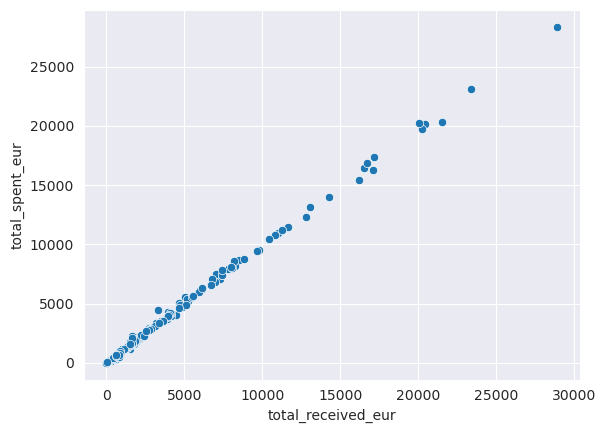

In [6]:
p = sns.scatterplot(data=df, x="total_received_eur", y="total_spent_eur")
plt.show(p)